In [1]:
#import libs for processing>
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',50)
sns.set(style = 'darkgrid')

In [2]:
cases = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv')
recover = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv")

In [3]:
# #lets drop the province/state col since it contains mostly nulls in all dfs
# cases.drop('Province/State' , axis =1 , inplace = True)
# recover.drop('Province/State' , axis =1 , inplace = True)
# deaths.drop('Province/State' , axis =1 , inplace = True)

In [4]:
#renaming the country/region column withsingle word
country_rn = {"Country/Region":"Country"}
cases.rename(columns =country_rn , inplace = True)
recover.rename(columns =country_rn , inplace = True)
deaths.rename(columns =country_rn , inplace = True)

In [5]:
#renaming the country/region column withsingle word
state_rn = {"Province/State":"state"}
cases.rename(columns =state_rn , inplace = True)
recover.rename(columns =state_rn , inplace = True)
deaths.rename(columns =state_rn , inplace = True)

In [6]:
cases.head(2)

,state,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,...,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723


In [7]:
cases.shape , deaths.shape , recover.shape

((275, 478), (275, 478), (260, 478))

In [8]:
# melt the date column

case_date = cases.columns[4:]
deaths_date = deaths.columns[4:]
recover_date = recover.columns[4:]

In [9]:
# melt the colum
all_cases = pd.melt(cases, id_vars =['Country' , "Lat" , "Long"], 
                    value_vars =case_date , 
                    var_name='date' , 
                    value_name="confirmed")

all_recover = pd.melt(recover, id_vars =['Country' , "Lat" , "Long"], 
                    value_vars =recover_date , 
                    var_name='date' , 
                    value_name="recovery")

all_deaths = pd.melt(deaths, id_vars =[ 'Country' , "Lat" , "Long"], 
                    value_vars =deaths_date , 
                    var_name='date' , 
                    value_name="deaths")

In [10]:
all_deaths.tail()

,Country,Lat,Long,date,deaths
130345,Vietnam,14.058324,108.277199,5/9/21,35
130346,West Bank and Gaza,31.952200,35.233200,5/9/21,3358
130347,Yemen,15.552727,48.516388,5/9/21,1271
130348,Zambia,-13.133897,27.849332,5/9/21,1257
130349,Zimbabwe,-19.015438,29.154857,5/9/21,1576


In [30]:
# merge the whole dataset
x = all_cases.merge(right=all_recover ,
                    how='left' , 
                    on = ['Country' , "Lat" , "Long" , "date"])

df =x.merge(right=all_deaths ,
                    how='left' , 
                    on = ['Country' , "Lat" , "Long" , "date"])


In [31]:
df.isna().sum()

Country          0
Lat            948
Long           948
date             0
confirmed        0
recovery     10428
deaths           0
dtype: int64

In [32]:
# fill na for recovery with 0

df['recovery'].fillna(0 , inplace=True)

In [33]:
# chanege date column to date time format

df['date'] = pd.to_datetime(df['date'])

In [34]:
df.dtypes

Country              object
Lat                 float64
Long                float64
date         datetime64[ns]
confirmed             int64
recovery            float64
deaths                int64
dtype: object

In [35]:
# change count to string

df['Country'] = df['Country'].astype('str')

In [36]:
# get a new column active cases

df['active'] = df['confirmed']-df['deaths']-df['recovery']

In [37]:
df.head()

,Country,Lat,Long,date,confirmed,recovery,deaths,active
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,0.0
1,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,0.0
2,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,0.0
3,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,0.0
4,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,0.0


In [38]:
# group by date

df1 = df.groupby('date')['confirmed' , 'recovery' , 'deaths' , "active"].sum().reset_index(drop = False)

In [39]:
df1.head()

,date,confirmed,recovery,deaths,active
0,2020-01-22,557,30.0,17,510.0
1,2020-01-23,655,32.0,18,605.0
2,2020-01-24,941,39.0,26,876.0
3,2020-01-25,1433,42.0,42,1349.0
4,2020-01-26,2118,56.0,56,2006.0


In [40]:
# frop by country and date

df2 = df.groupby(['Country' , 'date'])['confirmed' , 'recovery' , 'deaths' , "active"].sum().reset_index(drop = False)

In [41]:
df2.head()

,Country,date,confirmed,recovery,deaths,active
0,Afghanistan,2020-01-22,0,0.0,0,0.0
1,Afghanistan,2020-01-23,0,0.0,0,0.0
2,Afghanistan,2020-01-24,0,0.0,0,0.0
3,Afghanistan,2020-01-25,0,0.0,0,0.0
4,Afghanistan,2020-01-26,0,0.0,0,0.0


In [42]:
df.head()

,Country,Lat,Long,date,confirmed,recovery,deaths,active
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,0.0
1,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,0.0
2,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,0.0
3,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,0.0
4,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,0.0


In [43]:
import plotly.express as px

In [44]:
df5 = df.groupby(['Long' , 'Lat' ,"Country"])[['confirmed' , 'deaths' , 'active' , 'recovery']].max().reset_index(drop =False)



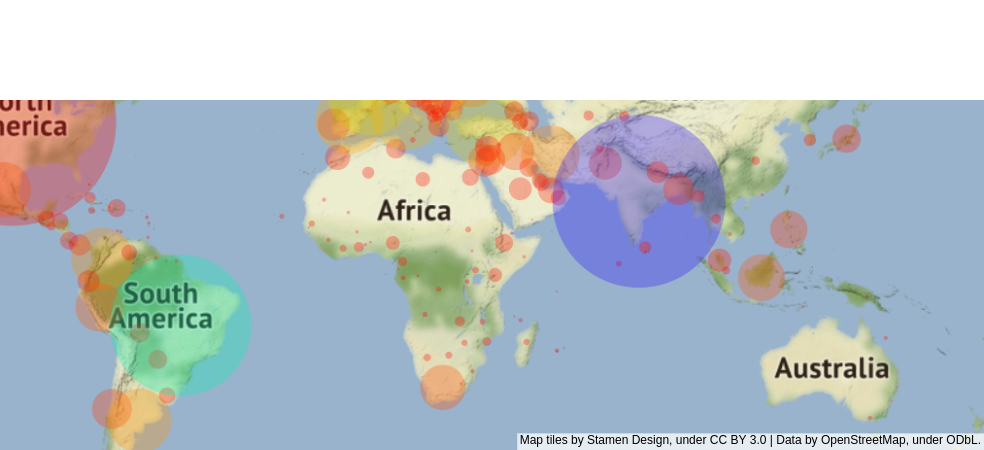

In [58]:
import plotly.graph_objects as go
fig = go.Scattermapbox(
    lon =df5['Long'],
    lat = df5['Lat'],
    mode = 'markers',
    marker =go.scattermapbox.Marker(
        size = df5['confirmed']/1500,
        color =df5['confirmed'],
        colorscale ='hsv',
        sizemode = 'area',
        opacity =0.3
    ),

    hoverinfo = 'text',
    hovertext = 
    '<b>Country : </b>  '+ df5['Country'].astype(str) +'<br>'+
    '<b>Longitude :</b> '+ df5['Long'].astype(str)+ '<br>'+
    '<b>Latitude :</b> '+ df5['Lat'].astype(str)+ '<br>'+
    '<b>Confirmed : </b> '+ [f'{x:,.0f} ' for x in df5['confirmed']] + '<br>'+
    '<b>Recoverd : </b> '+ [f'{x:,.0f} ' for x in df5['recovery']] + '<br>'+
    '<b>Deaths : </b> '+ [f'{x:,.0f} ' for x in df5['deaths']] + '<br>'+
    '<b>Active : </b> '+ [f'{x:,.0f} ' for x in df5['active']] + '<br>'

)
fig = go.Figure(fig)

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': 37, 'lat': -.02 },
        'zoom': 1.3
    },
    showlegend = False,
    margin = {'r':0 , 'l':0 ,'b':0},
)

fig.show()

In [48]:
# help(fig)

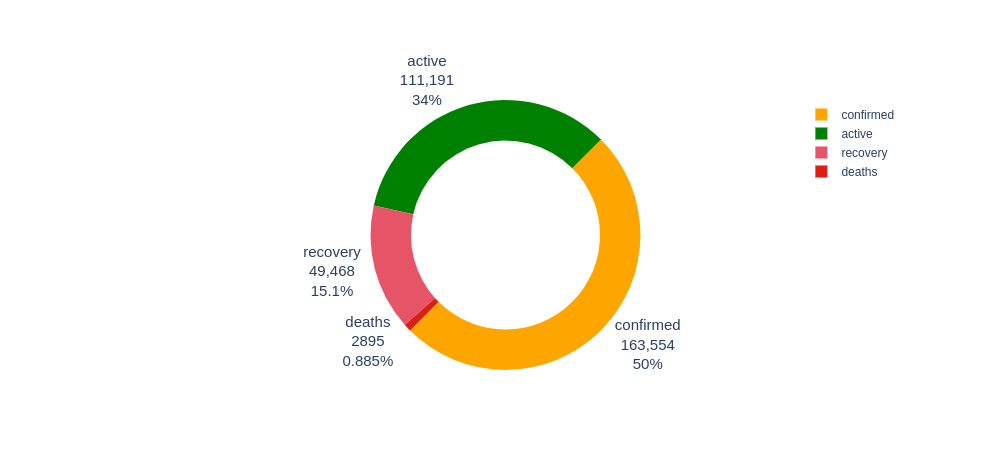

In [62]:
w_countries = "Kenya"

new_case = df2[df2['Country'] == w_countries]['confirmed'].iloc[-1]
new_death = df2[df2['Country'] == w_countries]['deaths'].iloc[-1]
new_active = df2[df2['Country'] == w_countries]['active'].iloc[-1]
new_recover = df2[df2['Country'] == w_countries]['recovery'].iloc[-1]


fig = go.Figure(
        go.Pie(
        labels = ['confirmed' , 'deaths' , 'recovery' , 'active'],
        values = [new_case , new_death , new_active, new_recover],
        marker = dict(colors =['orange' , '#dd1e15' , '#e55467' , 'green']),
        textinfo='label+value+percent',
        textfont = dict(size =15),
        hole =.7,
        rotation =45,
        #insidetextorientation ='radial',
    )
)

fig.show()

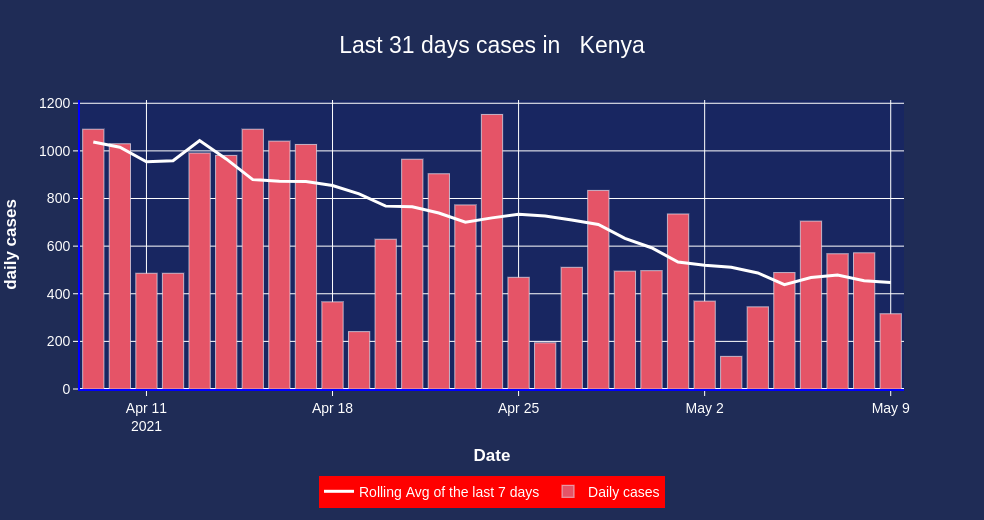

In [99]:
df3 = df[df['Country'] == w_countries][['Country' , 'date' ,'confirmed']].reset_index()
df3['daily_shift'] = df3['confirmed']- df3['confirmed'].shift(1)
df3['rolling_avg'] = df3['daily_shift'].rolling(window =7).mean()
fig = go.Figure(
    [
                go.Bar(
                x = df3[df3['Country'] ==  w_countries]['date'].tail(31),
                y = df3[df3['Country'] == w_countries]['daily_shift'].tail(31),
                name = "Daily cases",
                marker =dict(
                    color ='#e55467',
                ),
                hoverinfo='text',
                hovertext =
                '<b>Date  </b> ' + df3[df3['Country'] == w_countries]['date'].tail(31).astype(str) + '  <br>' +
                '<b>Daily Cases </b>  ' + [f'{x:,.0f}' for x in df3[df3['Country'] == w_countries]['daily_shift'].tail(31) ] + '  <br>' +
                '<b>Country  </b>  ' + df3[df3['Country'] == w_countries]['Country'].tail(31).astype(str)  + '  <br>'
            ) ,
                go.Scatter(
                x = df3[df3['Country'] == w_countries]['date'].tail(31),
                y = df3[df3['Country'] == w_countries]['rolling_avg'].tail(31),
                mode = 'lines',
                name = 'Rolling Avg of the last 7 days ',
                line = dict(width=3 , color ="#fff"),
                marker=dict(color ="green"),
                hoverinfo='text',
                hovertext=
                '<b>Date  </b> ' + df3[df3['Country'] == w_countries]['date'].tail(31).astype(str) + '  <br>' +
                '<b>Rolling_avg for Last 7 days </b>  ' + [f'{x:,.0f}' for x in df3[df3['Country'] == w_countries]['rolling_avg'].tail(31) ] + '  <br>' 
            )
    ]


)
fig.update_layout(
            width = 1200,
            height = 520,
            barmode = 'stack',
            plot_bgcolor ='rgba(23,36,100,.8)',
            paper_bgcolor ='#1f2c56',
            title={
                'text':f"Last 31 days cases in   {w_countries}",
                'y':0.93,
                'x':0.5,
                'xanchor':'center',
                'yanchor':'top',
            },
            titlefont={
                'color':'#fff',
                'size':23,

            },
            hovermode='x',
            xaxis = dict(
                title = '<b>Date</b>',
                color ='#fff',
                showline =True,
                showgrid = True,
                ticks='outside',
                showticklabels = True,
                linewidth=2,
                linecolor ='blue',
                tickfont=dict(
                    size =14,
                    color ='#fff',
                )
            ),

            yaxis = dict(
                title = '<b>daily cases</b>',
                color ='#fff',
                showline =True,
                showgrid = True,
                ticks='outside',
                showticklabels =True,
                linewidth=2,
                linecolor ='blue',
                tickfont=dict(
                    size =14,
                    color ='#fff',
                )
            ),

            legend={
                'orientation':'h',
                'bgcolor':'red',
                'xanchor':'center',
                'x':0.5,'y':-0.3,
            },
            font= dict(
                size =14,
                color ='#fff',
            ),
)
fig.show()

In [71]:
x = df3['confirmed'].shift(1)
df3['confirmed']

0          NaN
1      25088.0
2     -44522.0
3     -12061.0
4      88813.0
        ...   
323   -35686.0
324     2079.0
325    -1159.0
326    77282.0
327   -73130.0
Name: confirmed, Length: 328, dtype: float64

In [84]:
x = df3[df3['Country'] ==  w_countries]['date'].tail(31),
y = df3[df3['Country'] == w_countries]['daily_shift'].tail(31),

In [91]:
# df[df['Country'] ==  w_countries].tail(31)['date']
df3

,index,Country,date,confirmed,daily_shift,rolling_avg
0,160,Afghanistan,2020-06-30,31507,NaN,NaN
1,437,Afghanistan,2021-04-03,56595,25088.0,NaN
2,714,Albania,2020-09-18,12073,-44522.0,NaN
3,991,Algeria,2020-03-05,12,-12061.0,NaN
4,1268,Algeria,2020-12-07,88825,88813.0,NaN
...,...,...,...,...,...,...
323,89631,Yemen,2020-03-07,0,-35686.0,0.000000
324,89908,Yemen,2020-12-09,2079,2079.0,297.000000
325,90185,Zambia,2020-05-26,920,-1159.0,104.428571
326,90462,Zambia,2021-02-27,78202,77282.0,-5807.714286


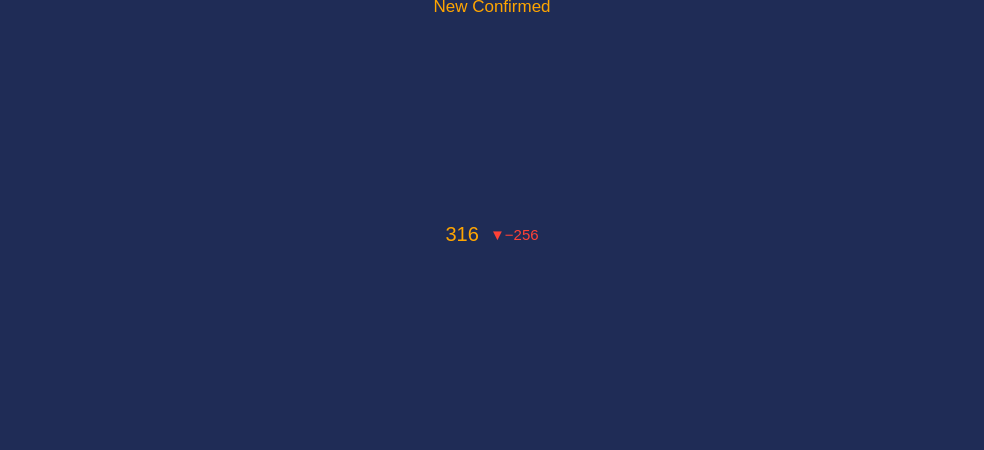

In [106]:
value_cases = df2[df2['Country'] == w_countries]['confirmed'].iloc[-1] - df2[df2['Country'] == w_countries]['confirmed'].iloc[-2]
change_cases = df2[df2['Country'] == w_countries]['confirmed'].iloc[-2] - df2[df2['Country'] == w_countries]['confirmed'].iloc[-3]

fig = go.Figure(
    go.Indicator(
            mode= 'number+ delta',
            value = value_cases,
            delta ={
                'reference':change_cases,
                'position':'right',
                'valueformat':'.9',
                'relative':False,
                'font':{'size':15}
            },
            number={'valueformat': '.' , 'font':{'size':20},},
            # domain={'v':[0,1] , 'x':[0,1]}
            )
)
fig.update_layout(
                title={
                'text':'New Confirmed',
                'y':1,
                'x':0.5,
                'xanchor':'center',
                'yanchor':'top',
            },
            font=dict(color ='orange'),
            paper_bgcolor='#1f2c56',
            plot_bgcolor='#1f2c57',
#             height=500,
#             width =200
)

fig.show()